In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [5]:
red = pd.read_csv('wineQualityReds.csv')
white = pd.read_csv('wineQualityWhites.csv')

In [6]:
red['type']= 'red'
white['type'] = 'white'

In [7]:
df = pd.concat([red,white])
df = df.drop(df.columns[0],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 6:
        reviews.append('0')
    elif i >= 7 and i <= 9:
        reviews.append('1')
                       
df['Reviews'] = reviews

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,0


In [10]:
X = df.drop(columns=['quality','type','Reviews','free.sulfur.dioxide'],axis=1)
y = df['Reviews']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
y_test.shape

(1950,)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
modlog = LogisticRegression()
modlog.fit(X_train,y_train)

/Users/liziwei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
pred = modlog.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
confusion_matrix(y_test,pred)

array([[1493,   64],
       [ 308,   85]])

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1557
           1       0.57      0.22      0.31       393

    accuracy                           0.81      1950
   macro avg       0.70      0.59      0.60      1950
weighted avg       0.78      0.81      0.77      1950



In [19]:
modlog.score(X_test,y_test)

0.8092307692307692

In [20]:
pred.astype('float')

array([0., 0., 0., ..., 0., 0., 0.])

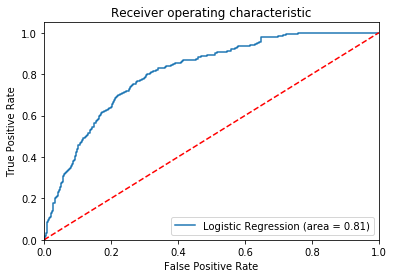

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = modlog.score(X_test,y_test)
fpr, tpr, thresholds = roc_curve(y_test.astype('float'), modlog.predict_proba(X_test)[:,1].astype('float'))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [22]:
roc_auc_score(y_test.astype('float'), modlog.predict(X_test).astype('float'))

0.5875901493869106

In [24]:
from mlxtend.plotting import plot_decision_regions

In [25]:
from sklearn.svm import SVC

In [26]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
pred2 = clf.predict(X_test)

In [28]:
confusion_matrix(y_test,pred2)

array([[1557,    0],
       [ 393,    0]])

In [29]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1557
           1       0.00      0.00      0.00       393

    accuracy                           0.80      1950
   macro avg       0.40      0.50      0.44      1950
weighted avg       0.64      0.80      0.71      1950



/Users/liziwei/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
X_train.values.shape[1]

10

ValueError: Filler values must be provided when X has more than 2 training features.

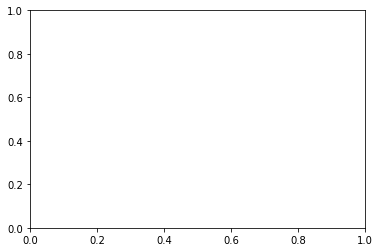

In [55]:
plot_decision_regions(X=X_train.values, 
                      y=y_train.values.astype(np.integer),
                      clf=clf, 
                      legend=2,
                     filler_feature_ranges=['fixed.acidity','volatile.acidity'])

In [ ]:
clf2 = SVC(kernel='linear')
clf.fit(X_train,y_train)